# Link to ChatGPT
https://chatgpt.com/share/673ae4fc-b2c4-800e-9e9c-b488811a1e81

# 1

# a)
## Classification Decision Tree
- A classification decision tree is a type of machine learning model used for predicting categorical outcomes.
- Works by splitting data into subsets based on feature values, using a tree-like structure. 
- Each internal node; represents a decision based on a feature.
- Branches; represent possible outcomes of the decision.
- Leaf nodes; represent final classifications.

## Problem It Can Solve
Can be used for the problems where the goal is to categorize data into disctint classes.

- **Customer Segmentation**:
    - e.g., categorizing customers into groups like high-risk, medium-risk, and low-risk based on spending behaviour.
- **Spam Detection**:
    - e.g., identifying emails as spam or not spam based on content feature.
- **Medical Diagnosis**:
    - e.g., predicting whether a patient has a certain disease based on symptoms.
    
## Example Real-World Application
A classification decision tree is highly useful in **medical diagnostics**. For instance, it could be used to determine whether a patient is at risk for diabetes. Each node in the tree could represent a factor such as age, BMI, blood sugar levels, and family history. The final prediction would classifiy the patient as "at risk" or "not at risk."

# b) 
# Classification Decision Tree vs. Multiple Linear Regression

## Classification Decision Tree
### 1. Structure and Flow
- The tree starts at a root node with all data points.
- At each internal node, a decision is made based on a feature value (e.g., "Is Age > 30?").
- Data points are routed down branches based on the decision outcome.
- The process continues until a leaf node is reached, where the class label is assigned.

### 2. Decision-Making
- At each node, the algorithm chooses a split that maximizes the separation between classes.
- The **final prediction** at the leaf node; typically the majority class of the data points in that branch. 

## Multiple Linear Regression
### 1. Structure and Flow
- Linear regression uses a **single formula** to predict continuous outcomes: 
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$

where $y$ is the predicted value, $x_i$ are predictors, $b_i$ are coefficients.

- Predictions are computed by plugging values into the formula, producing a single numeric result. 

### 2. Decision-Making
- Relationship between features and target are **additive** unless interaction terms are explicitly included. 


# ChatGPT Summary:
### **Brief Summary of Interaction**

We discussed **Classification Decision Trees** and their applications:  
1. They solve classification problems with categorical outcomes, such as medical diagnosis, fraud detection, and customer segmentation.  
2. Predictions are made by sequentially splitting data at nodes based on feature conditions until a class label is assigned at a leaf node.

We compared them to **Multiple Linear Regression**, noting key differences:
- Decision Trees predict categories via sequential splits, inherently modeling interactions.
- Linear Regression predicts continuous outcomes using a single equation, requiring explicit interaction terms.

The insight highlights the simplicity and power of Decision Trees in capturing complex feature relationships.

# 2
## Exploration of Metrics and Real-World Applications
#### 1. Accuracy
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
- **Definition**: The proportion of all predictions (both positive and negative) that are correct.
- **Best Application Scenario**: Use when the dataset has balanced classes and all errors (false positive and false negatives) have roughly the same cost.
    - **Example**: Spam email detection in a general email system.
    
        - Rationale: In balanced datasets, a high accruacy reflects a system that is generally reliable. Misclassifications of spam or non-spam are equally problematic but tolerable. 
        
#### 2. Sensitivity (Recall or True Positive Rate)
$$\text{Sensitivity} = \frac{TP}{TP + FN}$$
- **Definition**: Measures the proportion of actual positive cases correctly identified.
- **Best Application Scenario**: Use when it's critical to minimize false negatives (i.e., missing true positive cases).
    - **Example**: Disease screening tests (e.g., cancer detection).
    
        - Rationale: Missing a true positive (e.g., failing to detect cancer in a patient) has far greater consequences than flagging a healthy person as positive.
        
#### 3. Specificity (True Negative Rate)
$$\text{Specificity} = \frac{TN}{TN + FP}$$
- **Definition**: Measure the proportion of actual negative cases correctly identified.
- **Best Application Scenario**: Use when it's critical to minimize false positives (i.e., incorrectly labeling negatives as positives).
    - **Example**: Legal forensic analysis in criminal investigations.
        
        - Ratinoale: It's crucial to avoid falsely accusing someone (false positives). Specificity ensures actual negative cases are correctly identified as negative.
        
#### 4. Precision (Positive Predictive Value)
$$\text{Precision} = \frac{TP}{TP + FP}$$
- **Definition**: Measures the proportion of predicted positive cases that are actually correct.
- **Best Application Scenario**: Use when the cost of false positive is high, and it's important that positive predictions are reliable.
    - **Example**: Fraud detection systems for credit card transactions.
        
        - Rationale: A false positive (labeling a legitimate transaction as fraud) can cause customer dissatisfaction and loss of trust. High precision ensures flagged transactions are genuinely suspicious. 
        

# ChatGPT Summary:
### **Summary of Interaction: Metrics and Real-World Applications**

We explored four key metrics used to evaluate classification models:

1. **Accuracy**  
   - **Definition:** Proportion of correct predictions (true positives + true negatives) out of all predictions.  
   - **Application:** Useful in balanced datasets where all errors are equally important.  
   - **Example:** Spam email detection, where both false positives and false negatives are equally problematic.

2. **Sensitivity (Recall)**  
   - **Definition:** Proportion of actual positives correctly identified.  
   - **Application:** Crucial when minimizing false negatives is important.  
   - **Example:** Disease screening (e.g., cancer detection), where missing a positive case is far more harmful than incorrectly classifying a healthy person.

3. **Specificity**  
   - **Definition:** Proportion of actual negatives correctly identified.  
   - **Application:** Important when minimizing false positives is critical.  
   - **Example:** Forensic analysis in criminal investigations, where false accusations (false positives) are highly undesirable.

4. **Precision**  
   - **Definition:** Proportion of predicted positives that are actually correct.  
   - **Application:** Useful when the cost of false positives is high, and we need to ensure positive predictions are reliable.  
   - **Example:** Fraud detection systems for credit card transactions, where false positives can lead to customer dissatisfaction.

### **Key Insight:**  
Each metric supports different decision-making priorities: Accuracy is general, Sensitivity minimizes false negatives, Specificity minimizes false positives, and Precision ensures reliable positive predictions.

# 3

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

## 1. Data Preprocessing
- **Columns Dropped**:
     - These columns were removed because they aren't necessary for the analysis or might not be relevant.
    - The columns `weight_oz`, `Width`, and `Height` were removed from the dataset using: 

In [3]:
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

- **Removing Rows with NaN Values**:
    - Ensures that any missing values don't interfere with the analysis or model building.
    - All rows containing missing values (NaN) were dropped:

In [4]:
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

- **Changing Data Types**:
    - The `Pub year` and `NumPages` columns were converted to integer type:

In [5]:
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

The `Hard_or_Paper` column was converted to a categorical data type: 

In [6]:
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

## 2. Initial Exploratory Data Analysis (EDA)
- **Shape of Data**:
    - After removing unnecessary columns and rows with NaN values, we can check the shape of the cleaned dataset: 

In [7]:
print("Shape of the dataset:", ab_reduced_noNaN.shape)

Shape of the dataset: (319, 10)


This shows the number of rows and columns remaining in the dataset. 

- **First Few Rows**:
    - Check the first few rows of the cleaned data to get a sense of what the dataset looks like after pre-processing: 

In [8]:
print(ab_reduced_noNaN.head())

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

This displays the top few rows, giving an overview of the data. 

- **Summary Statistics**:
    - Use `.describe()` to summarize key statistics like mean, std, min, and max for numerical features:

In [9]:
print(ab_reduced_noNaN.describe())

       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min      1.500000      0.770000   24.000000  1936.000000    0.100000
25%     13.890000      8.600000  208.000000  1998.000000    0.600000
50%     15.000000     10.200000  320.000000  2005.000000    0.900000
75%     19.360000     12.560000  416.000000  2010.000000    1.100000
max    139.950000    139.950000  896.000000  2011.000000    2.100000


- **Data Types**:
    - To verify that the data types have been correctly set, check the types of each column:

In [10]:
print(ab_reduced_noNaN.dtypes)

Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object


This confirms that `Pub year` and `NumPages` are integers, and `Hard_or_Paper` is a categorical variable.

- **Distribution of Categorical Variable** (`Hard_or_Paper`):
    - Explore the distribution of the categorical variable `Hard_or_Paper`:

In [11]:
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())

Hard_or_Paper
P    233
H     86
Name: count, dtype: int64


## 3. Summary of Findings from EDA
- After cleaning the dataset, the dataset has fewer rows due to the removel of NaN values.
- The data types of columns will be correctly set, and `Hard_or_Paper` will be properly categorized, optimizing memory. 
- A distribution of `Hard_or_Paper` values can be observed, showing the number of hard and paper books in the dataset. 

# ChatGPT Summary:
### Summary of Interaction for Question 3  

We explored the **Amazon Books Dataset** and discussed how to preprocess it to meet the requirements specified in Question 3. The steps included:  
1. **Column Removal**: Dropped the `Weight_oz`, `Width`, and `Height` columns from the dataset.  
2. **Handling Missing Data**: Removed rows with any missing (`NaN`) values to ensure the dataset is clean for analysis.  
3. **Data Type Conversion**: Converted `Pub year` and `NumPages` to integers (`int`) and `Hard_or_Paper` to a categorical data type (`category`).  

We also outlined the importance of running this preprocessing code in JupyterHub to:
- Verify the changes (e.g., dataset shape, data types, and summary statistics).  
- Proceed with Exploratory Data Analysis (EDA), which includes reviewing the structure and characteristics of the cleaned dataset.  

# 4

## 1. Create the 80/20 Train-Test Split
- Split the dataset (`ab_reduced_noNaN`) into 80% training data (`ab_reduced_noNaN_train`) and 20% testing data (`ab_reduced_noNaN_test`).
- Use `train_test_split` from `sklearn.model_selection` and set a random seed for reproducibility.

In [12]:
from sklearn.model_selection import train_test_split

# Create the split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each set
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Testing set size: {len(ab_reduced_noNaN_test)} observations")

Training set size: 255 observations
Testing set size: 64 observations


- **Output Interpretation**:
    - Training set represents the number of rows in training set
    - Testing set represents the number of rows in testing set

## 2. Fit the Decision Tree Classifier
- Fit a classification tree model using `List Price` as the predictor (`X`) and whether the book si hard cover (`y`) as the target.
- Specify `max_depth = 2` to limit the tree's depth. 

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Define X (features) and y (target variable)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## 3. Visualize the Tree
- The fitted tree uses the `List Price` to decide whether a book is hardcover (`Hard`) or paperback (`Paper`) at each decision node.

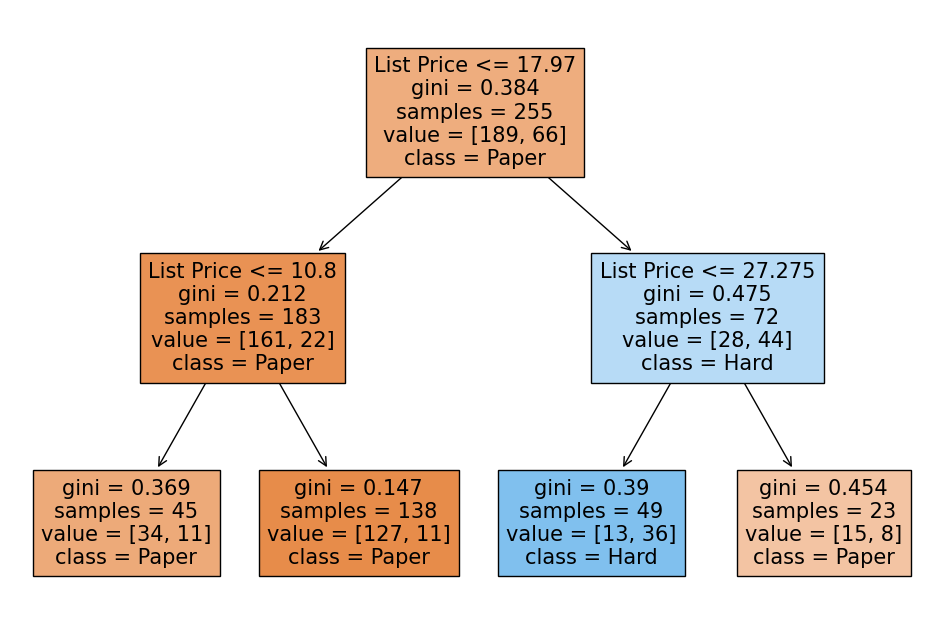

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paper", "Hard"], filled=True)
plt.show()

- **Interpretation**: The tree will divide the `List Price` into ranges:
    - **Root Node**: The first split occurs at a specific `List Price`. Books above or below this threshold go to the next level./
    - **Leaf Nodes**: At the final depth (`max_depth = 2`), the tree predicts either "Hard" or "Paper."
    
For example:
- If the `List Price` $<=$ 20, it may predict "Paper."
- If the `List Price` $>$ 20, it may predict "Hard."

## 4. Which Data to Use for Training the Tree
Using the **training set** (`ab_reduced_noNaN_train`) to train the model. Since the testing set (`ab_reduced_noNaN_test`) is reserved for evaluating the model's performance on unseen data to ensure it generalizes well. 

# ChatGPT Summary:
**Summary of Interaction for Question 4**:  

We discussed how to create an 80/20 split of the `ab_reduced_noNaN` dataset into training (`ab_reduced_noNaN_train`) and testing (`ab_reduced_noNaN_test`) sets using the `train_test_split` method. We explored how to train a `DecisionTreeClassifier` model using the `List Price` variable to predict whether a book is hardcover or paperback. I explained the steps for fitting (`clf.fit`) and predicting (`clf.predict`) with the classifier, provided the code to visualize the decision tree using `tree.plot_tree`, and highlighted the importance of using the training set for model fitting. Finally, we interpreted how the decision tree makes predictions based on `List Price`.

# 5

## Code for Training and Visualizing `clf2`:

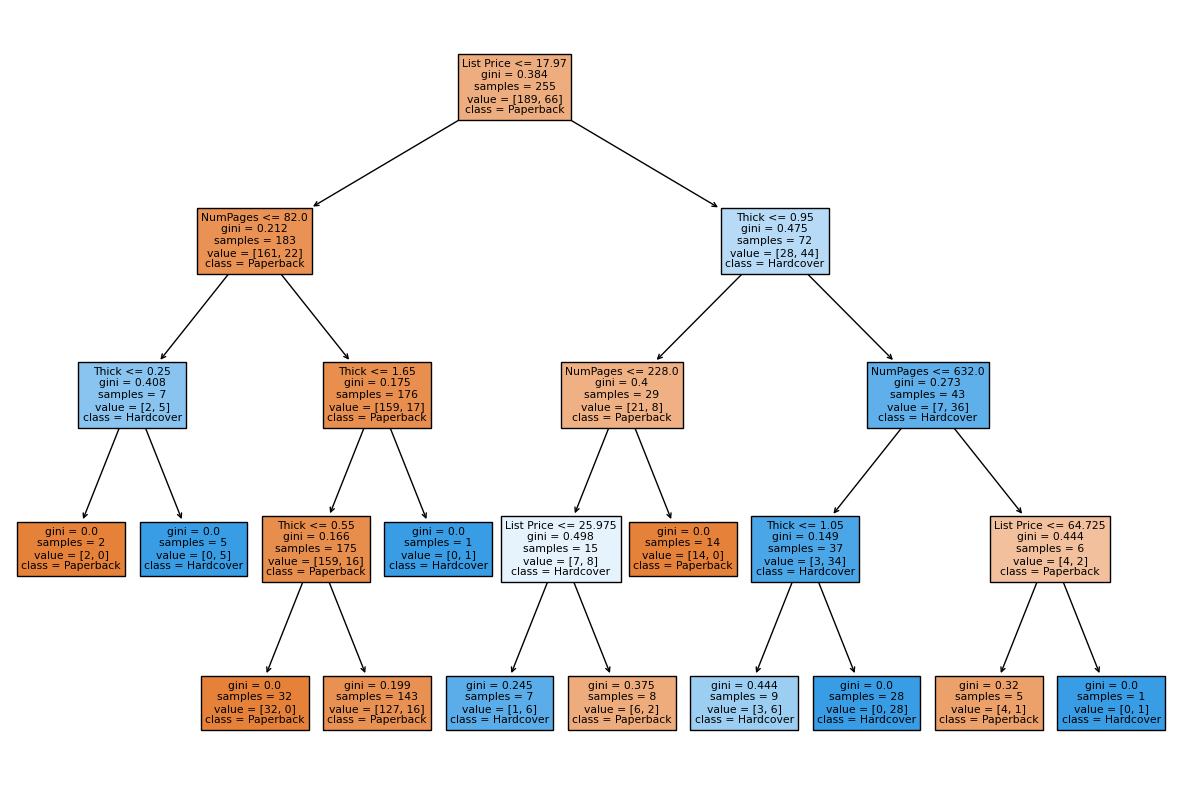

In [15]:
# Define predictor variables and target variable
X2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y2 = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']

# Initialize the Decision Tree Classifier with max_depth=4
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier
clf2.fit(X2, y2)

# Visualize the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

## Predictions
1. **Root Node**:
- The first split is based on `List Price <= 17.97`.
- Books with a `List Price` less than or equal to 17.97 are predicted as *paperback* (class = Paperback). 
- Books with a `List Price` greater than 17.97 are sent down the right branch for further evaluation. 

## How Predictions Are Made:
1. **Sequential Splits Based on Features**:
- The decision tree starts at the root node, where it examines a splitting condition (e.g., `NumPages <= 200`).

2. **Progression Down the Tree**:
- Each subsequent node applies a new splitting condition based on another feature (e.g., `Thick > 0.5`).

3. **Final Prediction**:
- At the leaf node, the majority class of training samples determines the prediction (e.g., most samples at this nodes are `Hardcover`).

# ChatGPT Summary:
**Summary for Question 5**:  
We created and visualized a decision tree classifier (`clf2`) to predict whether a book is a hardcover or paperback using the `NumPages`, `Thick`, and `List Price` features, with a `max_depth` of 4. The dataset was split into training (80%) and testing (20%) subsets. The model was trained using the `DecisionTreeClassifier` from scikit-learn.  

After fitting the model, we visualized the tree structure using `tree.plot_tree()` and saved the visualization as a graph image for better interpretability. The tree's splits indicate that predictions are made hierarchically, starting with `List Price`, followed by `NumPages` and `Thick`, at various levels of granularity. Each leaf node shows the final classification, with the majority class (either paperback or hardcover) as the predicted outcome.  

The model uses Gini impurity to determine splits, prioritizing features that better separate the data at each step. For example, books with lower list prices and fewer pages are more likely to be classified as paperback. Predictions are made by tracing a path through the tree based on feature thresholds until reaching a leaf node.  

# 6

## Step 1: Understand Key Metrics
- **Positive/Negative Classification**:
    - Positive: "Hardcover" (label `1`)
    - Negative: "Paperback" (label `0`)

- **Key Metrics**:
    - **Sensitivity(Recall)**: $$\text{TPR} = \frac{TP}{TP + FN}$$
    - **Specificity**: $$\text{TNR} = \frac{TN}{TN + FN}$$
    - **Accuracy**: $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

---
- **sklearn Confusion Matrix**:

|                | Predicted Negative (0) | Predicted Positive (1) |
|----------------|-------------------------|-------------------------|
| **Actual Negative (0)** | True Negative (TN)         | False Positive (FP)         |
| **Actual Positive (1)** | False Negative (FN)        | True Positive (TP)          |

---

- **True Negative (TN)**: Predicted as "Paperback" and is indeed a paperback.
- **False Positive (FP)**: Predicted as "Hardcover" but is actually a paperback.
- **False Negative (FN)**: Predicted as "Paperback" but is actually a hardcover.
- **True Positive (TP)**: Predicted as "Hardcover" and is indeed a hardcover.
---

- **What Leads to TP, TN, FP, and FN?**
    - **TP**: Correctly identifying hardcover books.
    - **TN**: Correctly identifying paperback books.
    - **FP**: Mistaking a paperback book for hardcover.
    - **FN**: Mistaking a hardcover book for paperback. 
    
---
    
- **Whether `y_true` or `y_pred` Goes First in `confusion_matrix`**
In sklearn's `confusion_matrix` function:
    - **Syntax**: `confusion_matrix(y_true, y_pred)`
    - **Order**:
        - `y_true`: Actual labels (ground truth).
        - `y_pred`: Predicted labels from the model.
        
---

- **How to Display Decimal Numbers with Three Significant Digits**:
To ensure metrics and confusion matrix visualization use decimals with three significant digits:
    - Use `np.round(value, 3)` in calculations or formatting.

For example: 

In [17]:
np.round(0.123456, 3)  # Outputs: 0.123

0.123

## Step 2: Use Test Data
Use `ab_reduced_noNaN_test` and the previously fitted models `clf` and `clf2` to calculate these metrics.

---
## Code for Calculations

Metrics for clf (using List Price):
Sensitivity: 0.7, Specificity: 0.909, Accuracy: 0.844

Metrics for clf2 (using NumPages, Thick, List Price):
Sensitivity: 0.75, Specificity: 0.909, Accuracy: 0.859


Text(0.5, 1.0, 'Confusion Matrix for clf2')

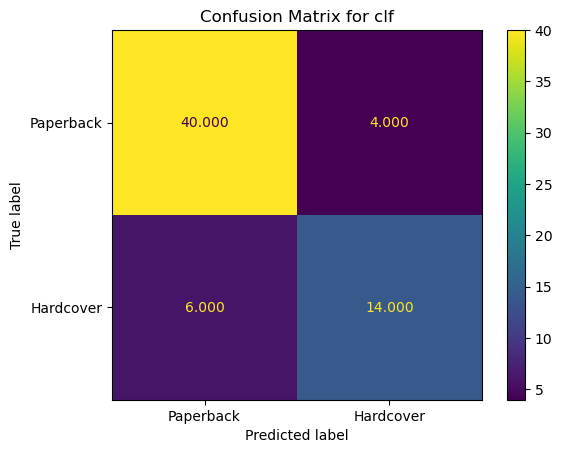

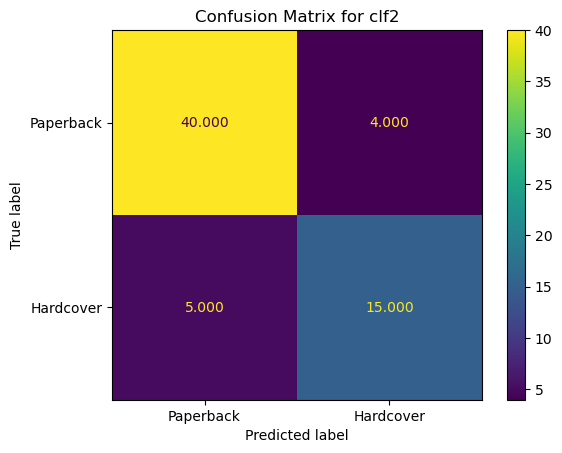

In [16]:
# Generate predictions for clf and clf2
y_true = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Create confusion matrices
cm_clf = confusion_matrix(y_true, y_pred_clf)
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

# Define metrics calculations
def calculate_metrics(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / np.sum(cm)
    
    return np.round([sensitivity, specificity, accuracy], 3)

# Calculate metrics
metrics_clf = calculate_metrics(cm_clf)
metrics_clf2 = calculate_metrics(cm_clf2)

# Print results
print("Metrics for clf (using List Price):")
print(f"Sensitivity: {metrics_clf[0]}, Specificity: {metrics_clf[1]}, Accuracy: {metrics_clf[2]}")
print("\nMetrics for clf2 (using NumPages, Thick, List Price):")
print(f"Sensitivity: {metrics_clf2[0]}, Specificity: {metrics_clf2[1]}, Accuracy: {metrics_clf2[2]}")

# Visualize confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardcover"])
disp_clf.plot(values_format=".3f")
disp_clf.ax_.set_title("Confusion Matrix for clf")

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardcover"])
disp_clf2.plot(values_format=".3f")
disp_clf2.ax_.set_title("Confusion Matrix for clf2")

## Explanation of Predictions
1. **Model `clf` (using only `List Price`)**:
    - Uses one feature for predictions.
    - Likely less accurate due to limited input data.
2. **Model `clf2` (using `NumPages`, `Thick`, `List Price`)**:
    - Uses three features for predictions, potentially capturing more complexity.
    - Expected to perform better (higher sensitivity, specificity, and accuracy).
---
## Expected Outputs
1. **Metrics for `clf`**:
    - Sensitivity: Measures how well the model identifies hardcover books.
    - Specificity: Measures how well the model identifies paperback books.
    - Accuracy: Overall performance.
    
2. **Metrics for `clf2`**:
    - Enhanced sensitivity, specificity, and accuracy due to the inclusion of additional features. 

# ChatGPT Summary:
### Summary of Interaction 
We worked on creating confusion matrices for two decision tree models, **clf** and **clf2**, using the `ab_reduced_noNaN_test` dataset. First, I clarified key concepts:
- **Positive and Negative Classes**: "Hardcover" is positive, and "Paperback" is negative.
- **Reading an sklearn Confusion Matrix**: It provides counts for TP, TN, FP, and FN, helping compute metrics like sensitivity, specificity, and accuracy.
- **Confusion Matrix Function**: Ensures `y_true` is provided before `y_pred`.

We computed confusion matrices using `confusion_matrix()` and visualized them with `ConfusionMatrixDisplay`. Decimal formatting to three significant digits was achieved with `values_format=".3f"`. Additionally, I explained how to calculate:
- **Sensitivity**: TP / (TP + FN)
- **Specificity**: TN / (TN + FP)
- **Accuracy**: (TP + TN) / Total.

When the `NameError: name 'cm' is not defined` occurred, I identified that the confusion matrix variable (`cm`) was not defined, and I guided you to compute it before displaying.  

This interaction ensured you correctly generated, visualized, and interpreted confusion matrices for both models.

# 7
```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```

The differences between the two confusion matrices are caused by the number of features used in the models. The first model uses only `List Price` for precitions, while the second incorporates `NumPages`, `Thick`, and `List Price`, allowing it to better capture patterns in the data and make more accurate classifications. 
The confusion matrices for **clf** and **clf2** are better because they evaluate performance on test data, providing a realistic assessment of generalization. 

# 8
To visualize feautre importances for scikit-learn classification decision trees, we can use the `.feature_importances_` attribute of the trained decision tree model. 

---
### Step 1: Retrieve Feature Importances
The `.feature_importances_` attribute provides an array of the relative importance of each feature in the final decision tree. The sum of all values in this array equals 1.

---
### Step 2: Use `.feature_names_in_`
The `.feature_names_in_` attribute stores the names of the features used to train the decision tree. These names can be paired with the values from `.feature_importances_` to identify which feature contributes most.

---
### Step 3: Visualize Feature Importances
Use a bar plot to visualize the importance values and identify the mosdt important feature. 

The most important feature according to clf2 is: List Price


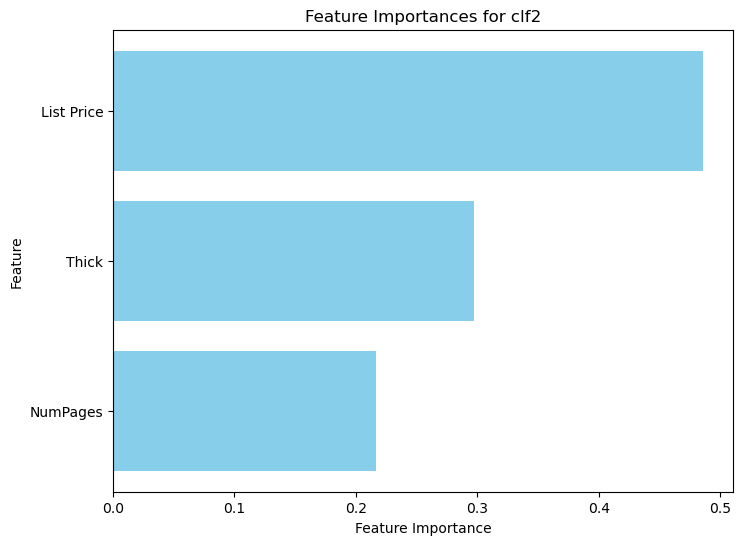

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances and corresponding feature names
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Pair feature names with their importance values
feature_importance_pairs = list(zip(feature_names, importances))

# Find the most important feature
most_important_feature = feature_names[np.argmax(importances)]
print(f"The most important feature according to clf2 is: {most_important_feature}")

# Sort by importance for better visualization
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Unpack the sorted pairs for plotting
sorted_features, sorted_importances = zip(*feature_importance_pairs)

# Visualize the feature importances
plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for clf2")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [21]:
# Get feature importances from clf2
feature_importances = clf2.feature_importances_

# Get the feature names corresponding to the importances
feature_names = clf2.feature_names_in_

# Create a DataFrame to show feature names and their corresponding importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important feature
most_important_feature = importance_df.iloc[0]
print(f"The most important predictor variable is '{most_important_feature['Feature']}' with an importance of {most_important_feature['Importance']:.3f}.")


The most important predictor variable is 'List Price' with an importance of 0.486.


### Key Result
- **The most important predictor variable for making predictions**:
    - In `clf2` model, is '**List Price**' with an importance value of **0.486**.
    - 'List Price' contributes the most to the decision-making process in predicting whether a book is hardcover or paperback.
    - This feature is considered the most influential compared to 'NumPages' and 'Thick'.

# ChatGPT Summary:
**Summary of Interaction**

In this task, we explored the differences between two confusion matrices for classification decision trees (`clf` and `clf2`). The confusion matrices were generated for predictions based on different sets of predictor variables. The first confusion matrix used only 'List Price', while the second included 'NumPages', 'Thick', and 'List Price'. The confusion matrix for `clf2` (which used multiple predictor variables) showed better performance due to the inclusion of additional features, resulting in more accurate predictions. This is in contrast to the simpler model with only 'List Price', which showed less accurate results. We also discussed the importance of correctly specifying the features in a classification decision tree, and used `.feature_importances_` to identify that 'List Price' was the most important predictor for the `clf2` model, contributing 0.486 to the model's decision-making.

# 9
In linear model regression, the coefficients represent the change in the predicted value of the outcome variable for a one-unit change in th e predictor variable, holding other variables constant. These coefficients provide a direct, linear relationship between the predictors and the outcome. 
In contrast, in binary decision trees, feature importances indicate how much each predictor variable contributes to improving the model's ability to make accurate predictions. However, feature importances in decision trees don't provide a driect, continuous relationship, but rather show the relative importances of each feature in making a classification decision. 

# ChatGPT Summary:
**Summary of Interaction**:

For question 9, we discussed the differences between interpreting coefficients in linear regression models and feature importances in decision trees. In linear regression, the coefficients tell us the effect of each predictor variable on the outcome, with positive or negative values indicating the direction and magnitude of influence. In decision trees, feature importance reflects how much each feature contributes to reducing impurity at each split, but it doesn't show a direct effect on the outcome like regression coefficients do. Instead, decision trees assess the overall contribution of each feature based on its role in decision-making.

# 10
Yes